In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Logistic_Iris.csv")

In [3]:
x = dataset.iloc[:, [0,1,2,3]].values

In [4]:
y = dataset.iloc[:, 4].values

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [7]:
models = []
acc_all = []
pres =[]
tpr=[]
fpr=[]

# Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

In [9]:
y_pred = classifier.predict(xtest)

In [10]:
acc= accuracy_score(ytest,y_pred)*100
print("Accuracy = ",acc)

Accuracy =  97.36842105263158


In [11]:
cm = confusion_matrix(ytest, y_pred)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [12]:
tp = sum(np.diagonal(cm))
fp = cm[1,0] + cm[2,0]
fn = cm[0,1] + cm[0,2]
tn = cm.sum()-(tp + fp + fn)

In [13]:
# Precision = (TP / (TP+FP)
pres1=tp / (tp + fp)

In [14]:
# Sensitivity, Recall, True Positive Rate = TP/P or TP / (TP+FN)
tpr1 = tp / (tp + fn)
fpr1 = fp / (fp + tn)

In [15]:
models.append(classifier)
acc_all.append(acc)
pres.append(pres1)
tpr.append(tpr1)
fpr.append(fpr1)

# For Naïve Bayes Classification

In [ ]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

In [17]:
y_pred = classifier.predict(xtest)

In [18]:
acc= accuracy_score(ytest,y_pred)*100

In [19]:
print("Accuracy = ",acc)

Accuracy =  100.0


In [20]:
cm = confusion_matrix(ytest, y_pred)

In [21]:
tp = sum(np.diagonal(cm))
fp = cm[1,0] + cm[2,0]
fn = cm[0,1] + cm[0,2]
tn = cm.sum()-(tp + fp + fn)

In [22]:
# Precision = (TP / (TP/FP)
pres1=tp / (tp + fp)

In [23]:
# Sensitivity, Recall, True Positive Rate = TP/P or TP / (TP+FN)
if (fp + tn) == 0:
    fpr1 = 0  # or any other suitable value
else:
  fpr1 = fp / (fp + tn)
tpr1 = tp / (tp + fn)

In [24]:
models.append(classifier)
acc_all.append(acc)
pres.append(pres1)
tpr.append(tpr1)
fpr.append(fpr1)

#Comparison of Classifiers

In [25]:
print("Classifiers used : \n",models)

Classifiers used : 
 [LogisticRegression(random_state=0), GaussianNB()]


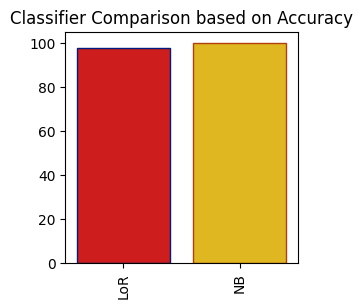

In [26]:
plt.subplots(figsize=(3,3))
labels=['LoR', 'NB']
sns.barplot(x=labels,y=acc_all,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Classifier Comparison based on Accuracy')
plt.show()

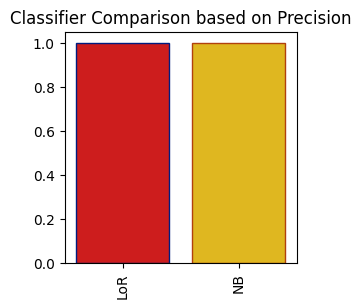

In [27]:
plt.subplots(figsize=(3,3))
labels=['LoR', 'NB']
sns.barplot(x=labels,y=pres,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Classifier Comparison based on Precision')
plt.show()

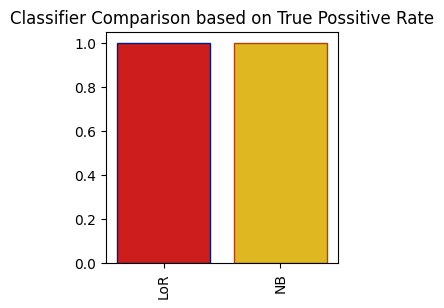

In [28]:
plt.subplots(figsize=(3,3))
labels=['LoR', 'NB']
sns.barplot(x=labels,y=tpr,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Classifier Comparison based on True Possitive Rate')
plt.show()

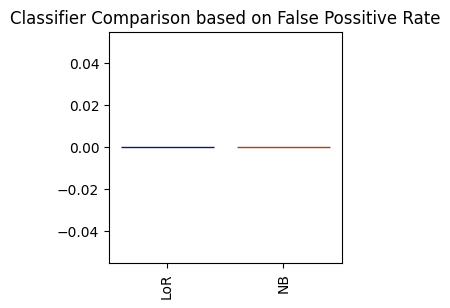

In [29]:
plt.subplots(figsize=(3,3))
labels=['LoR', 'NB']
sns.barplot(x=labels,y=fpr,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Classifier Comparison based on False Possitive Rate')
plt.show()